In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import KMeansSMOTE, SMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 22s 86us/step - loss: 0.4437 - val_loss: 0.3491
Epoch 2/150
256326/256326 [==============================] - 20s 78us/step - loss: 0.3372 - val_loss: 0.3214
Epoch 3/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.3171 - val_loss: 0.3017
Epoch 4/150
256326/256326 [==============================] - 19s 74us/step - loss: 0.3085 - val_loss: 0.3017
Epoch 5/150
256326/256326 [==============================] - 19s 74us/step - loss: 0.2988 - val_loss: 0

256326/256326 [==============================] - 18s 72us/step - loss: 0.2478 - val_loss: 0.3157
Epoch 72/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2502 - val_loss: 0.2741
Epoch 73/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2445 - val_loss: 0.2644
Epoch 74/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2430 - val_loss: 0.3382
Epoch 75/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2444 - val_loss: 0.2433
Epoch 76/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2424 - val_loss: 0.2420
Epoch 77/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2437 - val_loss: 0.2506
Epoch 78/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2428 - val_loss: 0.2474
Epoch 79/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2427 - val_loss: 0.2422
Epoch 80/150
256326/256

256326/256326 [==============================] - 18s 72us/step - loss: 0.2384 - val_loss: 0.2408
Epoch 146/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2383 - val_loss: 0.2890
Epoch 147/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2388 - val_loss: 0.2409
Epoch 148/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2372 - val_loss: 0.2433
Epoch 149/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2377 - val_loss: 0.2393
Epoch 150/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2377 - val_loss: 0.2438


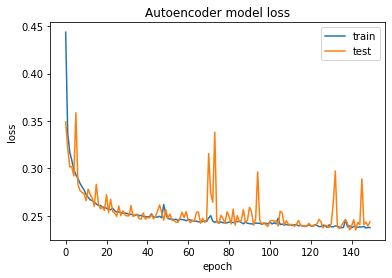

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0452 - accuracy: 0.9877 - val_loss: 0.0082 - val_accuracy: 0.9988
Epoch 2/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0066 - val_accuracy: 0.9988
Epoch 3/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 4/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0055 - val_accuracy: 0.9990
Epoch 5/50
256326/256326 [==============================] - 44s 170us/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0053 - val_accuracy: 0.9990
Epoch 6/50
256326/256326 [==============================] - 44s 170us/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0055 - val_accuracy: 0.9991
Epoch 7/50
256326/256326 [=================

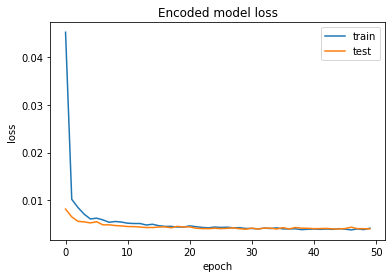

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992977774656788


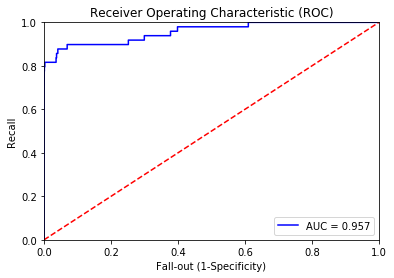

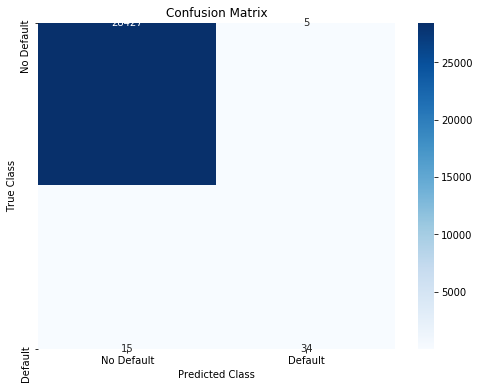

AUC(ROC): 0.8468508464162254
Precision: 0.8717948717948718
Recall: 0.6938775510204082
F1 score: 0.7727272727272728
False positives: 5
True positives: 34
False negatives: 15
True negatives: 28427
Fold #2


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.4521 - val_loss: 0.3526
Epoch 2/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.3427 - val_loss: 0.3168
Epoch 3/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.3111 - val_loss: 0.2948
Epoch 4/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2965 - val_loss: 0.2821
Epoch 5/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2905 - val_loss: 0

256326/256326 [==============================] - 18s 72us/step - loss: 0.2358 - val_loss: 0.2330
Epoch 72/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2370 - val_loss: 0.2305
Epoch 73/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2368 - val_loss: 0.2343
Epoch 74/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2365 - val_loss: 0.2346
Epoch 75/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2359 - val_loss: 0.2313
Epoch 76/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2362 - val_loss: 0.2301
Epoch 77/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2343 - val_loss: 0.2386
Epoch 78/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2353 - val_loss: 0.2529
Epoch 79/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2348 - val_loss: 0.2287
Epoch 80/150
256326/256

256326/256326 [==============================] - 18s 71us/step - loss: 0.2283 - val_loss: 0.2257
Epoch 146/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2292 - val_loss: 0.2342
Epoch 147/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2280 - val_loss: 0.2275
Epoch 148/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2278 - val_loss: 0.2329
Epoch 149/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2280 - val_loss: 0.2235
Epoch 150/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2283 - val_loss: 0.2271


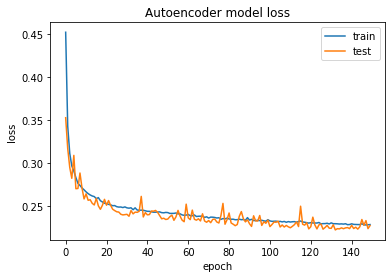

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0327 - accuracy: 0.9920 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/50
256326/256326 [==============================] - 44s 173us/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 44s 174us/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 4/50
256326/256326 [==============================] - 45s 174us/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 44s 174us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 44s 173us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

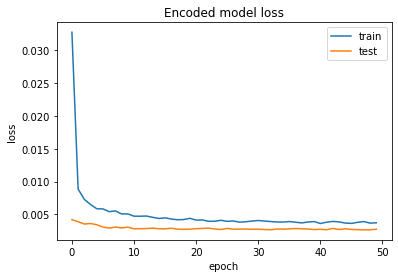

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994733330992591


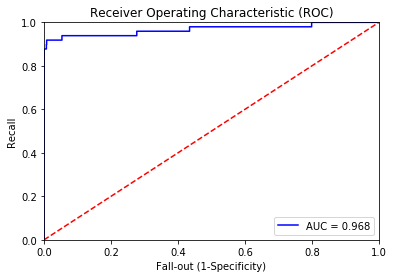

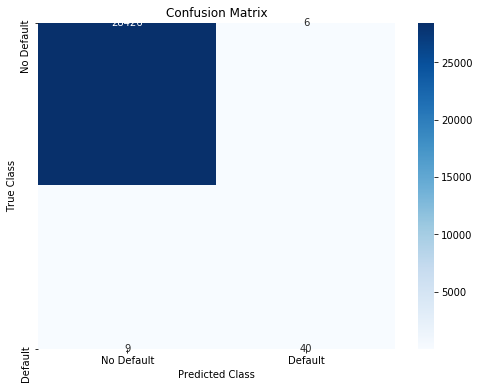

AUC(ROC): 0.9080577503933481
Precision: 0.8695652173913043
Recall: 0.8163265306122449
F1 score: 0.8421052631578948
False positives: 6
True positives: 40
False negatives: 9
True negatives: 28426
Fold #3


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.4307 - val_loss: 0.3358
Epoch 2/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.3303 - val_loss: 0.3050
Epoch 3/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.3079 - val_loss: 0.2902
Epoch 4/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2969 - val_loss: 0.2885
Epoch 5/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2875 - val_loss: 0

256326/256326 [==============================] - 18s 69us/step - loss: 0.2406 - val_loss: 0.2288
Epoch 72/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2404 - val_loss: 0.2305
Epoch 73/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2401 - val_loss: 0.2286
Epoch 74/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2397 - val_loss: 0.2488
Epoch 75/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2393 - val_loss: 0.2395
Epoch 76/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2396 - val_loss: 0.2307
Epoch 77/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2400 - val_loss: 0.2295
Epoch 78/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2405 - val_loss: 0.2349
Epoch 79/150
256326/256326 [==============================] - 18s 69us/step - loss: 0.2390 - val_loss: 0.2281
Epoch 80/150
256326/256

256326/256326 [==============================] - 18s 70us/step - loss: 0.2368 - val_loss: 0.2251
Epoch 146/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2369 - val_loss: 0.2376
Epoch 147/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2365 - val_loss: 0.2250
Epoch 148/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2360 - val_loss: 0.2354
Epoch 149/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2362 - val_loss: 0.2309
Epoch 150/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2360 - val_loss: 0.2260


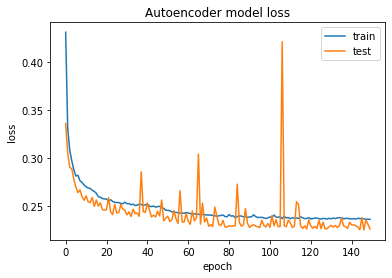

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0547 - accuracy: 0.9854 - val_loss: 0.0118 - val_accuracy: 0.9986
Epoch 2/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0113 - accuracy: 0.9983 - val_loss: 0.0087 - val_accuracy: 0.9990
Epoch 3/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0094 - val_accuracy: 0.9989
Epoch 4/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0076 - val_accuracy: 0.9990
Epoch 5/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.0067 - val_accuracy: 0.9991
Epoch 6/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0066 - val_accuracy: 0.9991
Epoch 7/50
256326/256326 [=================

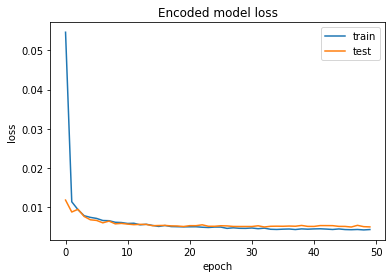

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9991573329588147


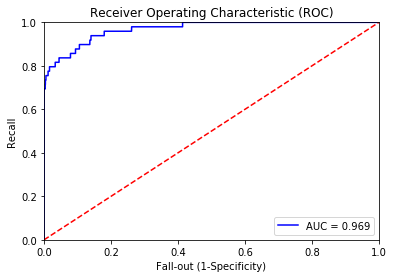

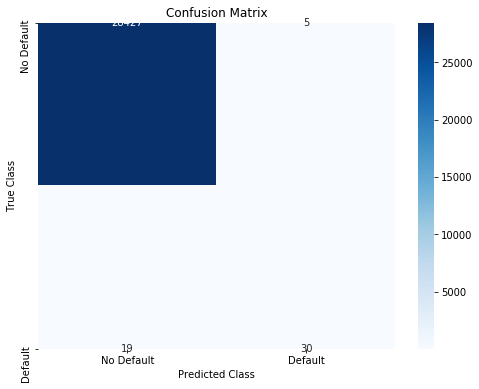

AUC(ROC): 0.8060345198856133
Precision: 0.8571428571428571
Recall: 0.6122448979591837
F1 score: 0.7142857142857143
False positives: 5
True positives: 30
False negatives: 19
True negatives: 28427
Fold #4


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 74us/step - loss: 0.4336 - val_loss: 0.3833
Epoch 2/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.3387 - val_loss: 0.3345
Epoch 3/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.3182 - val_loss: 0.3028
Epoch 4/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.3047 - val_loss: 0.2813
Epoch 5/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2948 - val_loss: 0

256326/256326 [==============================] - 19s 73us/step - loss: 0.2499 - val_loss: 0.2338
Epoch 72/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2486 - val_loss: 0.2315
Epoch 73/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2490 - val_loss: 0.2298
Epoch 74/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2489 - val_loss: 0.2304
Epoch 75/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2490 - val_loss: 0.2306
Epoch 76/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2486 - val_loss: 0.2464
Epoch 77/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2490 - val_loss: 0.2329
Epoch 78/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2489 - val_loss: 0.2295
Epoch 79/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2478 - val_loss: 0.2407
Epoch 80/150
256326/256

256326/256326 [==============================] - 19s 73us/step - loss: 0.2428 - val_loss: 0.2306
Epoch 146/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2429 - val_loss: 0.2296
Epoch 147/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2440 - val_loss: 0.2289
Epoch 148/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2432 - val_loss: 0.2317
Epoch 149/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2430 - val_loss: 0.2276
Epoch 150/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2425 - val_loss: 0.2331


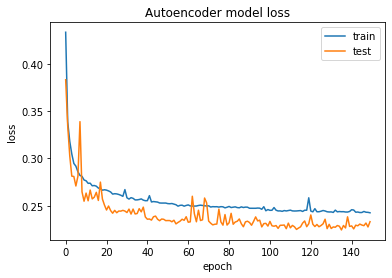

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 47s 182us/step - loss: 0.0310 - accuracy: 0.9945 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 2/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0095 - accuracy: 0.9986 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 50s 194us/step - loss: 0.0080 - accuracy: 0.9988 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 48s 188us/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 47s 183us/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 47s 184us/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

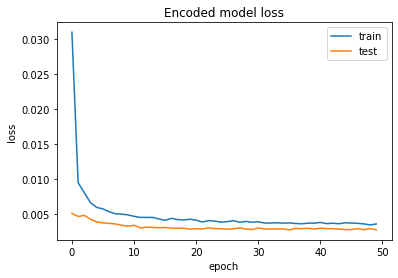

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994733330992591


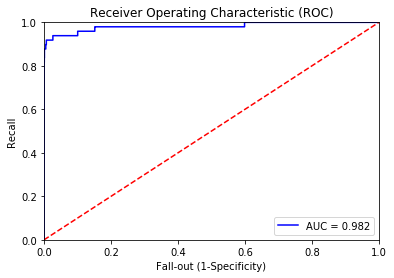

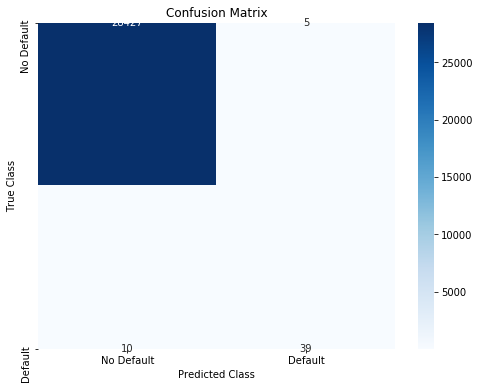

AUC(ROC): 0.8978712545794908
Precision: 0.8863636363636364
Recall: 0.7959183673469388
F1 score: 0.8387096774193548
False positives: 5
True positives: 39
False negatives: 10
True negatives: 28427
Fold #5


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.4461 - val_loss: 0.3597
Epoch 2/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.3418 - val_loss: 0.3229
Epoch 3/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.3102 - val_loss: 0.3137
Epoch 4/150
256326/256326 [==============================] - 19s 74us/step - loss: 0.2958 - val_loss: 0.2918
Epoch 5/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2835 - val_loss: 0

256326/256326 [==============================] - 19s 72us/step - loss: 0.2385 - val_loss: 0.2441
Epoch 72/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2392 - val_loss: 0.2459
Epoch 73/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2387 - val_loss: 0.2433
Epoch 74/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2387 - val_loss: 0.2452
Epoch 75/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2383 - val_loss: 0.2465
Epoch 76/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2382 - val_loss: 0.2636
Epoch 77/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2392 - val_loss: 0.2444
Epoch 78/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2401 - val_loss: 0.2425
Epoch 79/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2382 - val_loss: 0.2634
Epoch 80/150
256326/256

256326/256326 [==============================] - 18s 71us/step - loss: 0.2368 - val_loss: 0.2403
Epoch 146/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2364 - val_loss: 0.2420
Epoch 147/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2363 - val_loss: 0.2439
Epoch 148/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2361 - val_loss: 0.2479
Epoch 149/150
256326/256326 [==============================] - 20s 77us/step - loss: 0.2389 - val_loss: 0.2437
Epoch 150/150
256326/256326 [==============================] - 19s 72us/step - loss: 0.2359 - val_loss: 0.2443


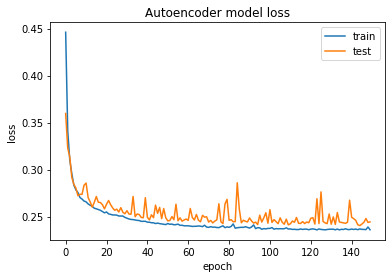

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 48s 186us/step - loss: 0.0556 - accuracy: 0.9842 - val_loss: 0.0089 - val_accuracy: 0.9988
Epoch 2/50
256326/256326 [==============================] - 48s 189us/step - loss: 0.0106 - accuracy: 0.9983 - val_loss: 0.0072 - val_accuracy: 0.9992
Epoch 3/50
256326/256326 [==============================] - 48s 189us/step - loss: 0.0081 - accuracy: 0.9986 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 48s 187us/step - loss: 0.0069 - accuracy: 0.9988 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 47s 182us/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 46s 181us/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

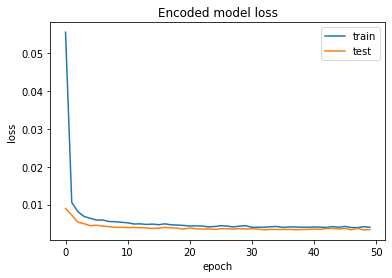

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679997191109


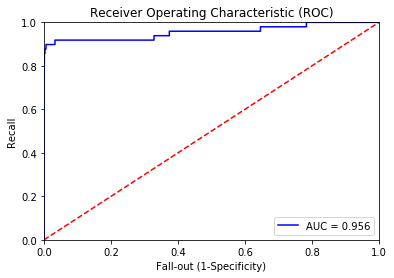

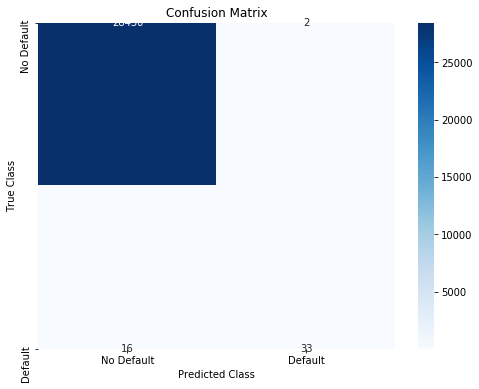

AUC(ROC): 0.8366995222399596
Precision: 0.9428571428571428
Recall: 0.673469387755102
F1 score: 0.7857142857142857
False positives: 2
True positives: 33
False negatives: 16
True negatives: 28430
Fold #6


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 20s 80us/step - loss: 0.4390 - val_loss: 0.3453
Epoch 2/150
256326/256326 [==============================] - 20s 77us/step - loss: 0.3228 - val_loss: 0.3081
Epoch 3/150
256326/256326 [==============================] - 20s 77us/step - loss: 0.3026 - val_loss: 0.2996
Epoch 4/150
256326/256326 [==============================] - 20s 77us/step - loss: 0.2961 - val_loss: 0.3084
Epoch 5/150
256326/256326 [==============================] - 20s 77us/step - loss: 0.2870 - val_loss: 0

256326/256326 [==============================] - 19s 76us/step - loss: 0.2363 - val_loss: 0.2432
Epoch 72/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2364 - val_loss: 0.2404
Epoch 73/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2360 - val_loss: 0.2582
Epoch 74/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2362 - val_loss: 0.2424
Epoch 75/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2355 - val_loss: 0.2403
Epoch 76/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2359 - val_loss: 0.2482
Epoch 77/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2360 - val_loss: 0.2428
Epoch 78/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2355 - val_loss: 0.2498
Epoch 79/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2356 - val_loss: 0.2427
Epoch 80/150
256326/256

256326/256326 [==============================] - 19s 76us/step - loss: 0.2271 - val_loss: 0.2323
Epoch 146/150
256326/256326 [==============================] - 20s 76us/step - loss: 0.2265 - val_loss: 0.2295
Epoch 147/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2266 - val_loss: 0.2298
Epoch 148/150
256326/256326 [==============================] - 19s 76us/step - loss: 0.2264 - val_loss: 0.2317
Epoch 149/150
256326/256326 [==============================] - 20s 76us/step - loss: 0.2287 - val_loss: 0.2456
Epoch 150/150
256326/256326 [==============================] - 20s 76us/step - loss: 0.2260 - val_loss: 0.2303


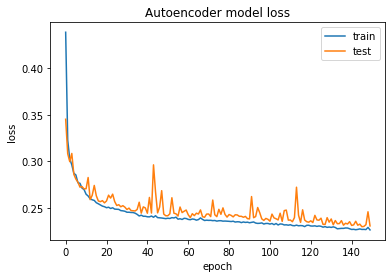

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0382 - accuracy: 0.9910 - val_loss: 0.0061 - val_accuracy: 0.9993
Epoch 2/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0082 - accuracy: 0.9988 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 45s 174us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

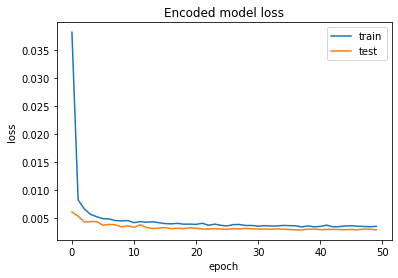

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995084442259752


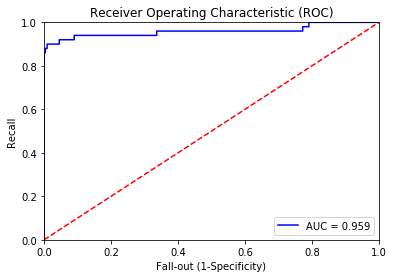

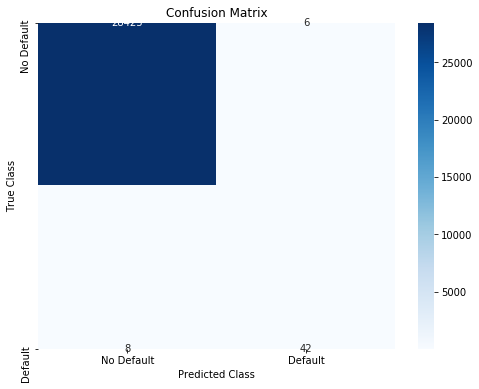

AUC(ROC): 0.9198944813759627
Precision: 0.875
Recall: 0.84
F1 score: 0.8571428571428572
False positives: 6
True positives: 42
False negatives: 8
True negatives: 28425
Fold #7


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 20s 78us/step - loss: 0.4376 - val_loss: 0.3507
Epoch 2/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.3395 - val_loss: 0.3349
Epoch 3/150
256326/256326 [==============================] - 19s 74us/step - loss: 0.3148 - val_loss: 0.2997
Epoch 4/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2994 - val_loss: 0.3317
Epoch 5/150
256326/256326 [==============================] - 19s 73us/step - loss: 0.2919 - val_loss: 0

256326/256326 [==============================] - 19s 75us/step - loss: 0.2471 - val_loss: 0.2491
Epoch 72/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2451 - val_loss: 0.2892
Epoch 73/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2461 - val_loss: 0.2407
Epoch 74/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2443 - val_loss: 0.2392
Epoch 75/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2452 - val_loss: 0.2418
Epoch 76/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2480 - val_loss: 0.2477
Epoch 77/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2450 - val_loss: 0.2420
Epoch 78/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2447 - val_loss: 0.2381
Epoch 79/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2438 - val_loss: 0.2403
Epoch 80/150
256326/256

256326/256326 [==============================] - 18s 70us/step - loss: 0.2410 - val_loss: 0.2394
Epoch 146/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2406 - val_loss: 0.2364
Epoch 147/150
256326/256326 [==============================] - 18s 70us/step - loss: 0.2411 - val_loss: 0.2353
Epoch 148/150
256326/256326 [==============================] - 18s 71us/step - loss: 0.2406 - val_loss: 0.2469
Epoch 149/150
256326/256326 [==============================] - 18s 72us/step - loss: 0.2399 - val_loss: 0.2356
Epoch 150/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.2397 - val_loss: 0.2399


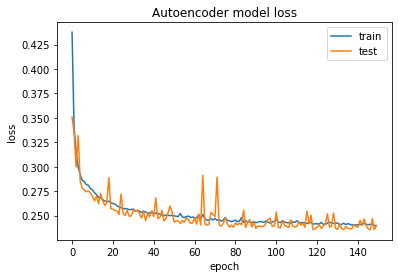

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0314 - accuracy: 0.9931 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.0064 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 45s 177us/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 45s 176us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

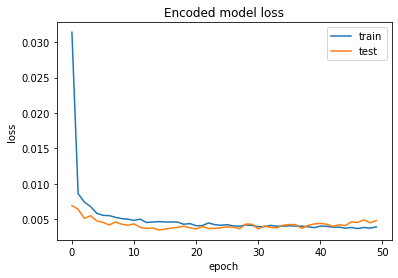

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999403110845827


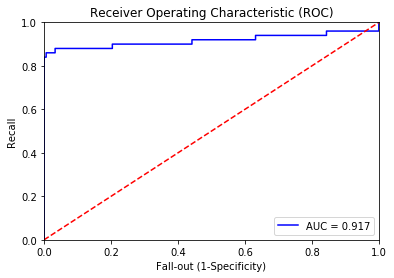

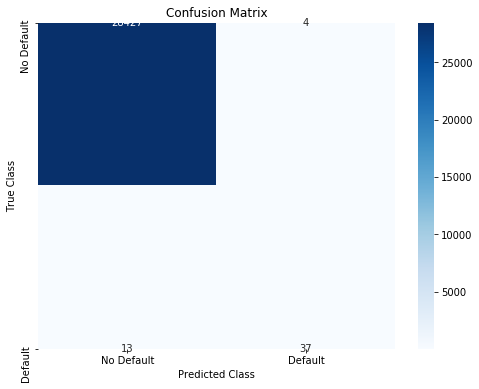

AUC(ROC): 0.8699296542506418
Precision: 0.9024390243902439
Recall: 0.74
F1 score: 0.8131868131868132
False positives: 4
True positives: 37
False negatives: 13
True negatives: 28427
Fold #8


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 21s 82us/step - loss: 0.4412 - val_loss: 0.3644
Epoch 2/150
256327/256327 [==============================] - 20s 80us/step - loss: 0.3444 - val_loss: 0.3242
Epoch 3/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.3218 - val_loss: 0.3110
Epoch 4/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.3072 - val_loss: 0.2969
Epoch 5/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.2984 - val_loss: 0

256327/256327 [==============================] - 20s 78us/step - loss: 0.2455 - val_loss: 0.2454
Epoch 72/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2436 - val_loss: 0.2685
Epoch 73/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2442 - val_loss: 0.2418
Epoch 74/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2438 - val_loss: 0.2699
Epoch 75/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2442 - val_loss: 0.2399
Epoch 76/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2440 - val_loss: 0.2413
Epoch 77/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2434 - val_loss: 0.2894
Epoch 78/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2434 - val_loss: 0.2512
Epoch 79/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2436 - val_loss: 0.2393
Epoch 80/150
256327/256

256327/256327 [==============================] - 19s 74us/step - loss: 0.2396 - val_loss: 0.2399
Epoch 146/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2385 - val_loss: 0.2402
Epoch 147/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2384 - val_loss: 0.2347
Epoch 148/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2382 - val_loss: 0.2361
Epoch 149/150
256327/256327 [==============================] - 19s 73us/step - loss: 0.2381 - val_loss: 0.2895
Epoch 150/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2401 - val_loss: 0.2436


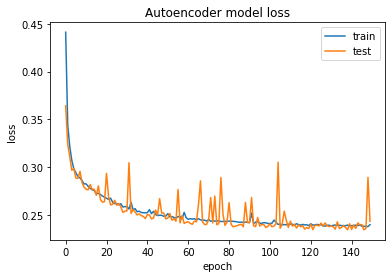

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 46s 179us/step - loss: 0.0244 - accuracy: 0.9953 - val_loss: 0.0069 - val_accuracy: 0.9991
Epoch 2/50
256327/256327 [==============================] - 45s 175us/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.0058 - val_accuracy: 0.9992
Epoch 3/50
256327/256327 [==============================] - 45s 176us/step - loss: 0.0067 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 45s 176us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 45s 176us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 6/50
256327/256327 [==============================] - 45s 176us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 7/50
256327/256327 [=================

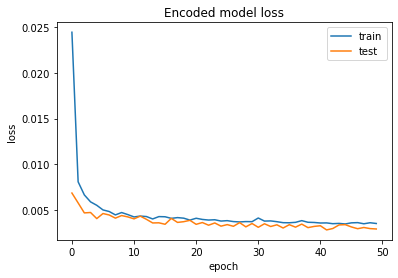

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993328651685394


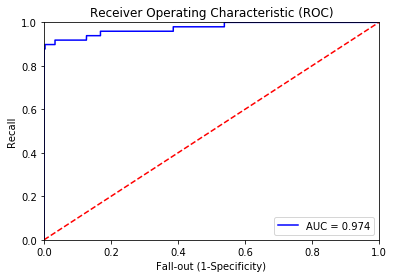

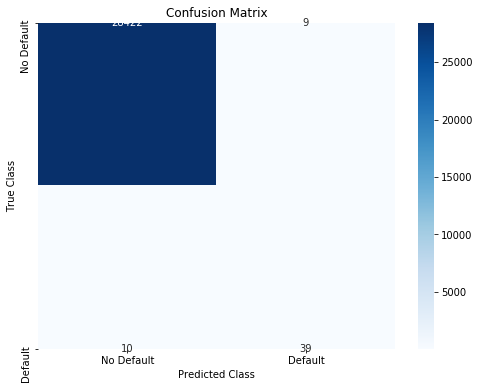

AUC(ROC): 0.8978009057374137
Precision: 0.8125
Recall: 0.7959183673469388
F1 score: 0.8041237113402061
False positives: 9
True positives: 39
False negatives: 10
True negatives: 28422
Fold #9


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 21s 81us/step - loss: 0.4467 - val_loss: 0.3878
Epoch 2/150
256327/256327 [==============================] - 20s 80us/step - loss: 0.3563 - val_loss: 0.3370
Epoch 3/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.3345 - val_loss: 0.3280
Epoch 4/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.3232 - val_loss: 0.3170
Epoch 5/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.3128 - val_loss: 0

256327/256327 [==============================] - 19s 75us/step - loss: 0.2488 - val_loss: 0.2527
Epoch 72/150
256327/256327 [==============================] - 19s 75us/step - loss: 0.2489 - val_loss: 0.2512
Epoch 73/150
256327/256327 [==============================] - 19s 76us/step - loss: 0.2484 - val_loss: 0.2465
Epoch 74/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2483 - val_loss: 0.2485
Epoch 75/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.2481 - val_loss: 0.2467
Epoch 76/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.2476 - val_loss: 0.2968
Epoch 77/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.2482 - val_loss: 0.2491
Epoch 78/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2483 - val_loss: 0.2473
Epoch 79/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2483 - val_loss: 0.2556
Epoch 80/150
256327/256

256327/256327 [==============================] - 19s 74us/step - loss: 0.2452 - val_loss: 0.2433
Epoch 146/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2444 - val_loss: 0.2434
Epoch 147/150
256327/256327 [==============================] - 19s 75us/step - loss: 0.2439 - val_loss: 0.2444
Epoch 148/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2446 - val_loss: 0.2436
Epoch 149/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2438 - val_loss: 0.2453
Epoch 150/150
256327/256327 [==============================] - 19s 74us/step - loss: 0.2445 - val_loss: 0.2457


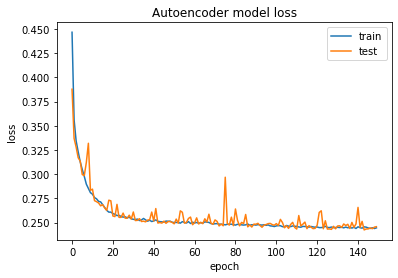

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 46s 181us/step - loss: 0.0393 - accuracy: 0.9924 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 2/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0101 - accuracy: 0.9986 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 3/50
256327/256327 [==============================] - 45s 177us/step - loss: 0.0074 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 45s 177us/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9994
Epoch 6/50
256327/256327 [==============================] - 46s 178us/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 7/50
256327/256327 [=================

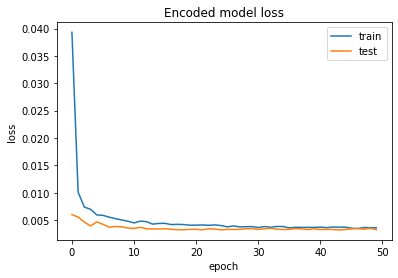

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679775280899


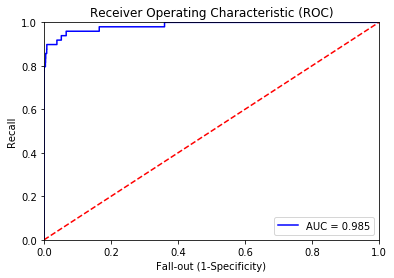

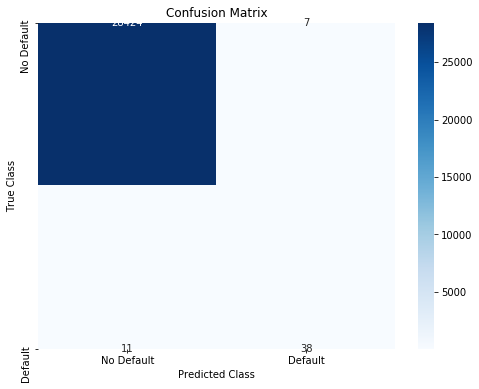

AUC(ROC): 0.8876319969794396
Precision: 0.8444444444444444
Recall: 0.7755102040816326
F1 score: 0.8085106382978723
False positives: 7
True positives: 38
False negatives: 11
True negatives: 28424
Fold #10


F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 21s 81us/step - loss: 0.4384 - val_loss: 0.3441
Epoch 2/150
256327/256327 [==============================] - 20s 79us/step - loss: 0.3335 - val_loss: 0.3119
Epoch 3/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.3166 - val_loss: 0.3064
Epoch 4/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.3044 - val_loss: 0.2991
Epoch 5/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2996 - val_loss: 0

256327/256327 [==============================] - 19s 72us/step - loss: 0.2409 - val_loss: 0.2369
Epoch 72/150
256327/256327 [==============================] - 18s 72us/step - loss: 0.2402 - val_loss: 0.2370
Epoch 73/150
256327/256327 [==============================] - 18s 72us/step - loss: 0.2412 - val_loss: 0.2361
Epoch 74/150
256327/256327 [==============================] - 19s 72us/step - loss: 0.2400 - val_loss: 0.2360
Epoch 75/150
256327/256327 [==============================] - 18s 72us/step - loss: 0.2400 - val_loss: 0.2392
Epoch 76/150
256327/256327 [==============================] - 19s 73us/step - loss: 0.2392 - val_loss: 0.2358
Epoch 77/150
256327/256327 [==============================] - 18s 72us/step - loss: 0.2412 - val_loss: 0.2374
Epoch 78/150
256327/256327 [==============================] - 19s 72us/step - loss: 0.2395 - val_loss: 0.2353
Epoch 79/150
256327/256327 [==============================] - 18s 72us/step - loss: 0.2389 - val_loss: 0.2365
Epoch 80/150
256327/256

256327/256327 [==============================] - 20s 77us/step - loss: 0.2338 - val_loss: 0.2319
Epoch 146/150
256327/256327 [==============================] - 20s 77us/step - loss: 0.2342 - val_loss: 0.2342
Epoch 147/150
256327/256327 [==============================] - 20s 77us/step - loss: 0.2347 - val_loss: 0.2340
Epoch 148/150
256327/256327 [==============================] - 20s 77us/step - loss: 0.2335 - val_loss: 0.2350
Epoch 149/150
256327/256327 [==============================] - 20s 78us/step - loss: 0.2334 - val_loss: 0.2313
Epoch 150/150
256327/256327 [==============================] - 20s 77us/step - loss: 0.2356 - val_loss: 0.2329


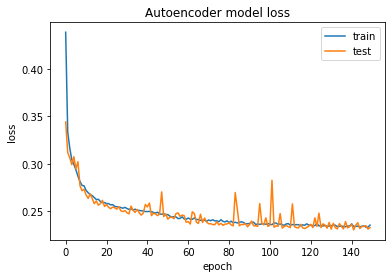

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 46s 181us/step - loss: 0.0377 - accuracy: 0.9920 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 2/50
256327/256327 [==============================] - 45s 176us/step - loss: 0.0105 - accuracy: 0.9983 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 3/50
256327/256327 [==============================] - 45s 175us/step - loss: 0.0083 - accuracy: 0.9986 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 45s 175us/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 45s 175us/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 6/50
256327/256327 [==============================] - 45s 175us/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/50
256327/256327 [=================

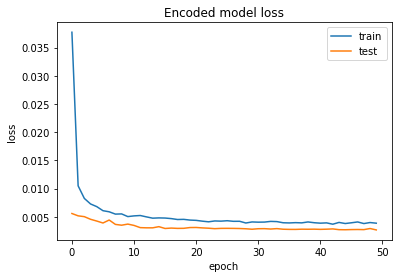

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994733146067416


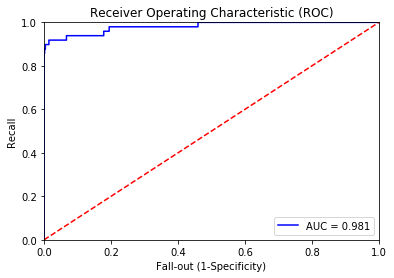

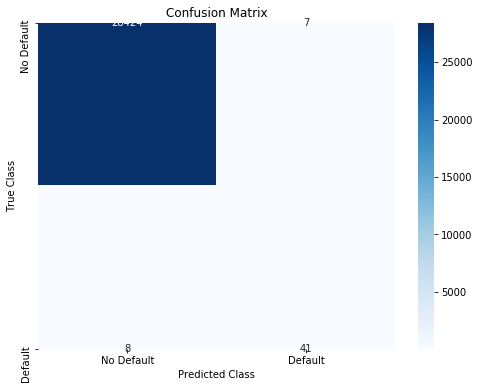

AUC(ROC): 0.9182442418773988
Precision: 0.8541666666666666
Recall: 0.8367346938775511
F1 score: 0.845360824742268
False positives: 7
True positives: 41
False negatives: 8
True negatives: 28424


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    sm = SMOTE()
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    sm=KMeansSMOTE()
    
    X_res_train, y_train_res = sm.fit_sample(X_res_train, y_train_res.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 28425.9
 Average fp = 5.6
 Average fn = 11.9
 Average tp = 37.3
 Average Precision = 0.8694638694638694
 Average Recall = 0.758130081300813
 Average F1 score = 0.8099891422366993


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284259
 Total fp: 56
 Total fn: 119
 Total tp: 373
 Total Precision = 0.8694638694638694
 Total Recall = 0.758130081300813
 Total F1_score = 0.8099891422366993


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 51276.65823316574 seconds ---
51276.65823316574


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

14.243516175879373
